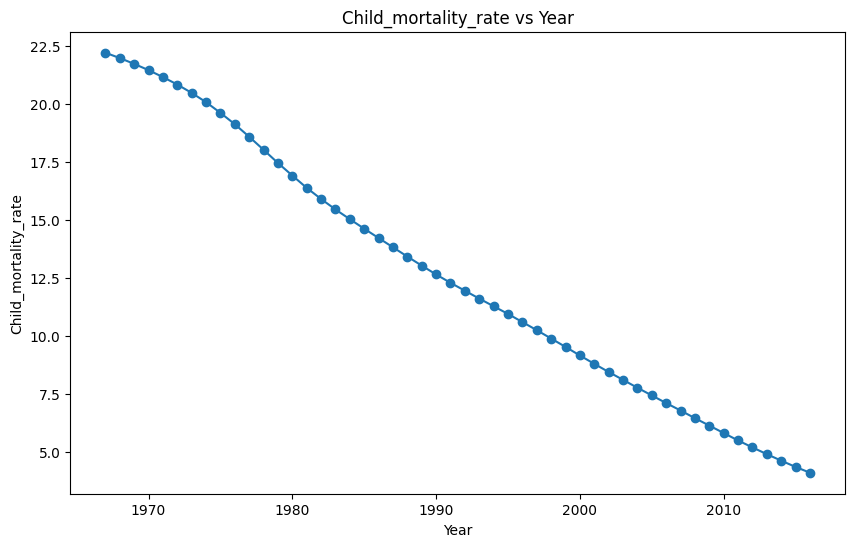

The graph is strictly decreasing.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def analyze_csv(path, x_col, y_col):
    # Load data
    df = pd.read_csv(path)
    country = 'IND'
    df = df[df.iloc[:,1]==country]

    # x = df[x_col].values
    # y = df[y_col].values

    x = df.iloc[50:100,-2]
    y = df.iloc[50:100,-1]
 

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker="o")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col}")
    plt.show()

    diffs = np.diff(y)   
    trend = np.sign(diffs)

    if np.all(trend >= 0):
        return "The graph is strictly increasing."
    elif np.all(trend <= 0):
        return "The graph is strictly decreasing."
    else:
        # Count direction changes
        changes = np.sum(trend[1:] != trend[:-1])
        if changes == 0:
            return "The graph is mostly flat."
        elif changes < len(trend) * 0.2:
            return f"The graph has {changes} direction changes, mostly monotonic with some fluctuations."
        else:
            return f"The graph is wiggly with {changes} ups and downs."


result = analyze_csv("./data/child-mortality.csv", "Year", "Child_mortality_rate")
print(result)